Unsupervised datasets may include datasets for customer segmentation
Most of the time it's possible to convert a supervised dataset to unsupervised to see how they look when plotted

Lets use MNIST datset which is a very popular dataset of handwritten digits.This dataset can easily be converted to an unsupervised setting for basic visualization.

If I do  a t-Distributed Stochastic Neighbour Embedding(t-SNE) decompostion, we can see that we can separate the images to some extent just by doing two components on the image pixels.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [3]:
data = datasets.fetch_openml(
                'mnist_784',
                 version=1,
                  return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

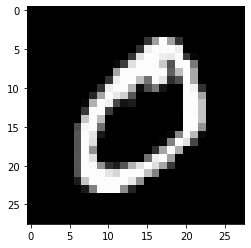

In [4]:
# we can visualize the samples in the dataset by reshaping them to their original shape and then plotting them using matplotlib
single_image = pixel_values[1, :].reshape(28, 28)

plt.imshow(single_image, cmap='gray')

In [6]:
# creating a t-SNE transformation of the data
tsne = manifold.TSNE(n_components=2, random_state=42)

transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [8]:
# converting transformed data to a pandas dataframe 
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x","y", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)
tsne_df

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9
...,...,...,...
2995,9.038110,58.850792,7
2996,-29.405334,-60.951775,0
2997,13.466378,47.369007,9
2998,-2.435752,7.983772,1


Here we're creating a pandas dataframe from a numpy array.
There are three columns: x,y and targets. x and y are the two components from t-SNE decompositon and targets is the actual number.

In [12]:
# plotting it using seaborn and matplotlib

grid = sns.FacetGrid(tsne_df, hue="targets",size=8)
grid.map(plt.scatter, "x", "y").add_legend()

TypeError: __init__() got an unexpected keyword argument 'size'

We can also do k-means clustering and see hoe it performs in an unsupervised setting.


## Cross Validation
This a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data.

We use it to detect ovefitting

Lets look at the red-wine dataset which has 11 different attributes that decide the quality of red wine

These attributes inlude:
 > firxed acidiy
 > volatile acidity
 > citric acid
 > residual sugar
 > chlorides
 > free sulfur dioxide
 > total sulfur dioxide
 > density
 > pH
 > sulphates
 > alcohol
 
Based on these different attributes, we are required to predict the quality of red wine which is a value between 0 and 10



In [2]:
wine_df = pd.read_csv('C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES/winequality-red.csv')

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine_df = wine_df.reset_index(drop=True)
print(wine_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
# treating the proble as a classification problem. Since the dataset consists of only six types of quality values, we will thus map all quality values from 0 to 5
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5,
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the directory
wine_df.loc[:, "quality"] = wine_df.quality.map(quality_mapping)

In [5]:
# lets split the data to two parts
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
wine_df = wine_df.sample(frac=1).reset_index(drop=True)

# top 1000 rows are selected
# for training
df_train = wine_df.head(1000)

# bottom 599 values are selected
# for testing/validation
df_test = wine_df.tail(599)

In [6]:
# lets train a decision tree model on the training set using scikit-learn
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier class
# with a max_depth of 3

clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
       'volatile acidity',
       'citric acid',
       'residual sugar',
       'chlorides',
       'free sulfur dioxide',
       'total sulfur dioxide',
       'density',
       'pH',
       'sulphates',
       'alcohol']
# train the model on the provided feautres
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
clf.fit(df_test[cols], df_test.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
# make predictions on the training set
train_predictions = clf.predict(df_train[cols])

# compute the accuracy of the perdictions
accuracy = metrics.accuracy_score(df_train.quality,predictions)

#print the accuracy
print("Accuracy:", accuracy)

NameError: name 'predictions' is not defined

In [9]:
test_predictions = clf.predict(df_test[cols])

accuracy = metrics.accuracy_score(df_test.quality,test_predictions)

In [10]:
print("test_Accuracy:", accuracy)

test_Accuracy: 0.6210350584307178


In [11]:
import matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

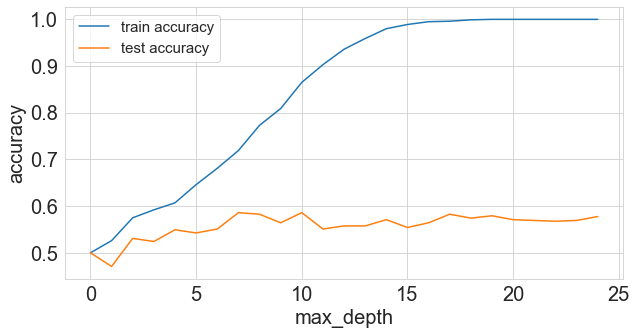

In [12]:
# calculating accuracies for different values of max_depth and making plots
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# global size of label text on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)



#initializing lists to store accuracies starting with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # columns/features for training
    cols = [
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
    ]
    
    # fit the model
    clf.fit(df_train[cols], df_train.quality)
    
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# create two plot

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show


    


This is a good way to visualize how the model's acccuracy changes as you vary the value of `max_depth`. You are iterating over different values of `max_depth`, training a Decision Tree model on each value, making predictions on both the training and test sets, then calculating the accuracy of the predictons

The plot shows the training and test accuracies as a function of `max_depth`. This can help one understand how the model's perfomance changes as you increase the depth of the tree

It is generally a good idea to look at both the training and test accuracies as you vary the model hyperparameters, as this can give you an idea of whether the model is overfitting or underfitting to the training data. If the training accuracy is much higher than the test accuracy, it could indicate the model is overfitting and may not generalize well to new data. On the other hand, if the training accuracy is significantly lower that the test accuracy, it could mean that the model is underfitting and may not be able to capture the undelying patterns in the data.

It is also a good idea to set the `random_state` parameter when creating the `DecisionTreeClassifier` object to ensure that the results are reproducible. This can be done by adding `random_state=123` initiallizing the classifier.

## Types of cross validation

> k-fold cross-validation
> stratified k-fold cross-validation
> hold-out based validation 
> leave-one-out cross validation
> group k-fold cross-alidation

Cross-validation is dividing training data into a few parts. We train the model on some of this parts and test on the remaining parts.

We can split any data into k-equal parts using kFold from scikit-learn. Each sample is assigned a value from 9 to k-1 when using k-fold cross validation.

In [16]:
import pandas as pd
from sklearn import model_selection

if not wine_df.empty=="__main__":
    df = pd.read_csv('C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES/winequality-red.csv')
    
    df["kfold"] = -1
    
    # Randomizing the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
    
    # fetch targets
    y = df.target.values
    
    #initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    for f, (t_, v_) in enumerate(kf.split(x=df, y=y)):
        df.loc[v_, 'kfold'] = f
        
    # save the new csv with kfold column
    df.to_csv("train_folds.csv", index=False)



AttributeError: 'DataFrame' object has no attribute 'target'

Text(0, 0.5, 'count')

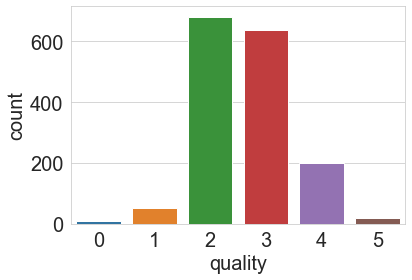

In [17]:
# using the wine dataset, let us look at the distribution of labels
b = sns.countplot(x='quality', data=wine_df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

Cross-validation is the first and most essential step when it comes to building machine learning models. If you want to do feature engineering, split your data first. If you havea a good cross-validation scheme in which validation data is representative of training and real-world data, you will be able to build a good machine learning model which is highly generalizable.

# Evaluation Metrics
If we talk about classification problems, the most common metrics used are:
> Accuracy
> Precision(P)
> Recall(R)
> F1 score(F1)
> Area under the ROC(Receiver Operating Characteristics) or simply AUC
> Log loss
> Precision at k(P@k)
> Average precision at k(AP@k)
> Mean average precision at k(MAP@k)

When it come to regression, the most commonly used evaluation metrics are:

> Mean absolute error(MAE)
> Mean squared error(MSE)
> Root mean squared error(RMSE)
> Root mean squared logarithimic error(RMSLE)
> Mean percentage error(MPE)

* Mean absolute percentage error(MAPE)
* R^2

Whe we have an equal number of positive and negative samples in a binary classification metric, we generally use accuracy, precision,recall and fl.

### Accuracy
It is one of the most straightforward metrics used in machine learning.
It defines how accurate your model is. e.g if you build a model that classifies 90 images accurately, your accuracy is 90% or 0.90. If only 83 images are classified correctly, the accuracy of your model is 83% or 0.83.


In [6]:
def accuracy(y_true,y_pred):
    """
    Function to calculate accuracy
    :param y_true:list of values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1
        
    # return accuracy
    #which is correct predictions over the number of samples
    return correct_counter/len(y_true)

In [7]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)

0.625

#### True postive(TP)
If your model predicts the image has pneomothorax, and the actual target for that image has pneomothorax image, it is considered a true positive.

#### True negative(TN)
If your model predicts that the image does not have pneumothorax and the actual target says that it is a non_pneumothorax image, it is considered as a true negative.

In simple words, if your model correctly predicts positive class, it is true positive, and if your model accurately predicts negative class it is a true negative.

#### False positive(FP)
if your model predicts pneumthorax and the actual target for that image is non-pneumothorax, it is a false positive.

#### False negative
If your model predicts non-pneumothorax and the actual target is pneumothorax, it is a false negative.

In simple words, if your model incorrrectly(or falsely) predicts postive class, it is a false positive.If your model incorrectly(or falsely) predicts negative class, it is a false negative.

i.e 

In [9]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    
    #initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn +=1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false postives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [10]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [11]:
true_positive(l1, l2)

2

In [12]:
false_positive(l1,l2)

1

In [13]:
false_negative(l1,l2)

2

In [14]:
true_negative(l1,l2)

3

Accuracy Score = (TP+TN)/(TP+TN+FP+FN)

In [15]:
def accuracy_v2(y_true, y_pred):
    """
    Funtion to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [16]:
from sklearn import metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [17]:
accuracy(l1, l2)

NameError: name 'accuracy' is not defined

In [18]:
metrics.accuracy_score(l1, l2)

0.625

In [19]:
accuracy_v2(l1, l2)

0.625

### Precision

* It is one indicator of a machine learning model's perfomance- *the quality of a positive prediction made by the model*. Precision refers to the number of true postives divided by the total number of positive predictions(i.e the number of true positives plus the number of false positives).

In [20]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

In [21]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [22]:
precision(l1, l2)

0.6666666666666666

### Recall
    
    * Recall = TP/(TP + FN)*
  
  Recall gives us information about a classifiers perfomance w.r.t the false negatives
  Precision is about being being precise. It gives us info about perfomance w.r.t the false positive

In [23]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [24]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

recall(l1, l2)

0.5

Most of the models predict a probability, and when we predict, we usually choose this threshold to be 0.5. This threshold is not always ideal, and depending on this threshold, your value of precision and recall can change drastically. If for every threshold we choose, we calculate the precision and recall values, we can create a plot between these sets of values. This plot or curve is known as the precision-recall curve.

Let's assume two lists.

In [25]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [26]:
y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937,  0.0191491,  0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377,   0.08584789, 0.039095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

In [32]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

# how we assumed these threholds is a long story
thresholds =  [0.0490937 , 0.05934905, 0.079377,
               0.08584789, 0.11114267, 0.11639273,
               0.15952202, 0.17554844, 0.18521942,
               0.27259048, 0.31620708, 0.33056815,
               0.39095342, 0.61977213]

# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precision.append(p)
    recall.append(r)

AttributeError: 'function' object has no attribute 'append'

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

TypeError: float() argument must be a string or a number, not 'function'

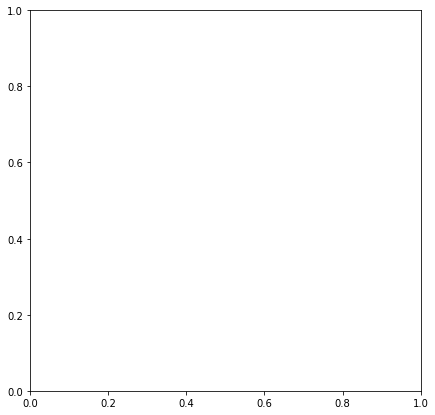

In [34]:
plt.figure(figsize=(7,7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

Both precision and recall range from 0 to 1 and a value closer to 1 is better

### F1 Score
This is a metric that combines both precision and recall.
It is defines as a simple weighted average(harmonic mean) of precision and recall.Lets denote precision using P and recall using R

             F1 = 2TP/(2TP + FP + FN)
             

In [35]:
def f1(y_true, y_pred):
    """
    Funtction to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    
    score = 2 * p * r / (p + r)
    
    return score

In [36]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

f1(y_true, y_pred)

0.5714285714285715

In [37]:
# using scikit learn we get

from sklearn import metrics

metrics.f1_score(y_true, y_pred)

0.5714285714285715

F1 score also ranges from 0 to 1, and a perfect prediction model has an F1 of 1. When dealing with datasets that have skewed targets, we should at F1 instead of accuracy.

#### Crucial terms we should know

* TPR or True Positive Rate, which is the same as recall.
                
                TPR = TP/(TP + FN)

* TPR or recall is also known as sensitivity.
* FPR or False Positive Rate, which is defined as:

      FPR = FP / (TN + FP)
* And 1-FPR is known as Specificity or True Negative Rate or TNR

Let's calculate only two values i.e TPR and FPR

In [39]:
# empty lists to store tpr
# and fpr values

tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
         0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
             0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tpr
    temp_tpr = tpr_list(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr_list(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

TypeError: 'list' object is not callable

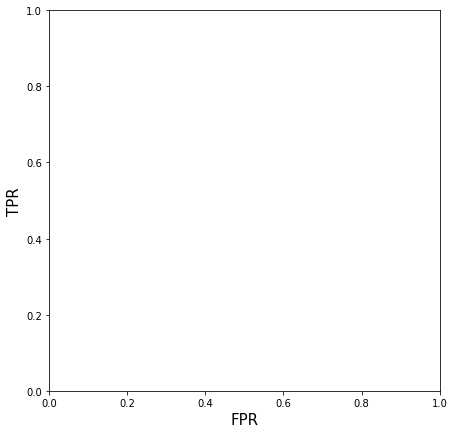

In [40]:
# plotting TPR on y-axis and FPR on the x-axis;
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

The curve above is also known as the Receiver Operating Characteristic (ROC)

### Area Under ROC Curve/Area Under Curve (AUC)

This metric is used very often when you have a dataset which has skewed binary targets
There are many ways to calculate the AUC we'll use scikit-learn for this purpose



In [2]:
from sklearn import metrics


In [3]:
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

In [4]:
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

In [5]:
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

AUC values range from 0 to 1
 * AUC = 1 implies you have a perfect model.
 * AUC = 0 implies that your model is very bad(or very good!). Try inverting the probabilities for the predictions e.g if your probability for the postive class is p, try substituing it with l-p. This kind of AUC may also mean that there is some problem with your validation or data processing.
 * AUC = 0.5 implies that your predictions are random. So, for any binary classification problem, if i predict all targets as 0.5, I will get an AUC of 0.5
 
AUC values between 0 and 0.5 imply that your model is worse than random. Most of the time, it's because you inverted the classes

In [8]:
# empty lists to store true postive
# and false positive values
tp_list = []
fp_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]

# some handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x>= thresh else 0 for x in y_pred]
    # calculate tp
    temp_tp = true_positive(y_true, temp_pred)
    # calculate fp
    temp_fp = false_positive(y_true, temp_pred)
    # append tp and fp to lists
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

NameError: name 'true_positive' is not defined

AUC is widely used for skewed binary classification tasks in the indusry

### LOG LOSS

In the case of a binary classification problem, we use log loss. Where target is either 0 or 1 and the prediction is a probability of a sample belonging to class 1

We define as:

Log Loss = -1.0 * (target * log(prediction) + (1 - target) * log(1-prediction)

Log loss penalizes quite high for an incorrect or a far-off prediction i.e log loss punishes you for being very sure and very wrong.

In [1]:
import numpy as np

def log_loss(y_true, y_proba):
    """
    Function to calculate fpr
    :param y_true: list of true values
    :param y_proba: list of probalities for 1
    :return: overall log loss
    """
    
    # define an epsilon value
    # this can also be an input
    # his value is used to clip probabilities
    epsilon = 1e-15
    # initialize empty list to store
    # individual losses
    loss = []
    # loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust probability
        # 0 gets converted to 1e-15
        # 1 gets converted to 1-1e-15
        # Why? Think abou it!
        yp = np.clip(yp, epsilon, 1 - epsilon)
        # calculate loss for one sample
        temp_loss = -1.0*(
            yt + np.log(yp)
            + (1 - yt) * np.log(1 -yp)
        )
        # add to loss list
        loss.append(temp_loss)
        # return mean loss over all samples
    return np.mean(loss)

In [3]:
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
           0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
           0.85, 0.15, 0.99]

log_loss(y_true, y_proba)

1.0843794793256254

In [4]:
# lets compare this with scikit-learn
from sklearn import metrics

metrics.log_loss(y_true, y_proba)

0.49882711861432294

So, even though we can choose a cut off at 0.5 and get perfect predictions, we will
still have a very high log loss. So, when dealing with log loss, you need to be very
careful; any non-confident prediction will have a very high log loss.

Most of the metrics that we discussed until now can be converted to a multi_class version. We can calculate precision and recall for each class in a multi-class classification problem.

Lets begin with precision first.We know that precision depends on true positives and false positives.

   *### Macro averaged precision: calculate precision for all classes individually and average them
   *### Micro averaged precision: calculate class wise true positive and false positive and the use tha to calculate overall precision
   *### Weighted precision: same as macro but in this case, it is weighted average depending on the number of items in each class
   



In [1]:
# macro-averaged precision
import numpy as np

def macro_precision(y_true, y_pred):
    """
    Function to calculate macro averaged precision
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: macro precision score
    """
    
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    
    # initializa precision to 0
    precision = 0
    
    # loop over all classes
    for class_ in range(num_classes):
        
        # all classes except curren class
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate true positives for current class
        tp = true_positive(temp_true, temp_pred)
        
        # calculate false positive for current class
        temp_precision = tp / (tp + fp)
        
        # keep adding precision for all classes
        precision += temp_precision
        
    # calculate and return average precision over all classes
    precison /= num_classes
    return precision

In [2]:
# micro precision

import numpy as np
def micro_precision(y_true, y_pred):
    """
    Function to calculate micro averaged precision
    :param y_true: list of true values
    :param y_proba: list of predicted values
    return: micro precision score
    """
    
    # find the number of classes by taking
    # length of unique alues in true list
    num_classes = len(np.unique(y_true))
    
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate true positve for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        
    # calculate and return overall precision
    precision = tp / (tp + fp)
    return precison
    

### Implementation of weighted precision


In [3]:
from collections import Counter
import numpy as np

def weighted_precision(y_true, y_pred):
    """
    Function to calculate weighted averaged precision
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: weighted precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    
    # create class:sample count dictionary
    # it looks something like this:
    # {0:20, 1:15, 2:21}
    class_counts = Counter(y_true)
    
    # initialize precision to 0
    precision = 0
    
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate tp and fp for class
        tp = true_positve(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        
        # calculate precision of class
        temp_precision = tp / (tp + fp)
        
        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precison
        
        # add to overall precision
        precision += weighted_precision
    # calculate overall precision by dividing by
    # total number of samples
    overall_precision = precision / len(y_true)
    return overall_precision

In [5]:
# comparing our implementations with scikit-learn to know if we implemented it right
from sklearn import metrics

y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]


In [6]:
macro_precision(y_true, y_pred)

NameError: name 'true_positive' is not defined

In [8]:
metrics.precision_score(y_true, y_pred, average="macro")

0.3611111111111111

In [9]:
metrics.precision_score(y_true, y_pred, average="micro")

0.4444444444444444

In [11]:
micro_precision(y_true, y_pred)

NameError: name 'true_positive' is not defined

In [12]:
weighted_precision(y_true, y_pred)


NameError: name 'true_positve' is not defined

In [13]:
metrics.precision_score(y_true, y_pred, average="weighted")

0.39814814814814814

We can also perform the recall metric for multi-class as well as F1. You can similarly convert AUC and logg loss to multi_class formats too. This format of converdion is known as one-vs-all

In binary or multi_class classification, it is also quite popular to look at confusion matrix which is a table of TP,FP,TN, & FN. Using the confusion matrix, you can quickly see how many samples were misclassified and how many were classified correctly.

We need to calculate precision, recall, F1 score and AUC. FP is referred to as Type-1 error and FN as Type-2 error

A perfect confusion matrix should only be filled diagonally from left to right.

Text(0.5, 50.5, 'Predicted Labels')

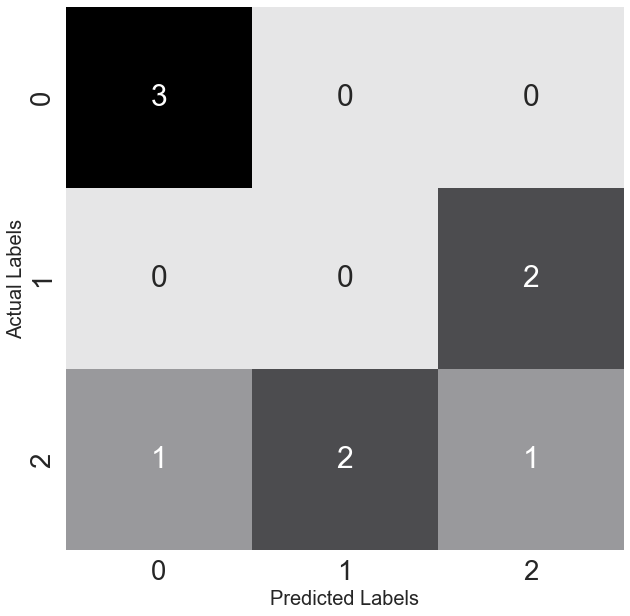

In [17]:
# example of a confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

So far we've tackled metrics for binary and multi-class classification
The comes another type of classification called Multi_label classification

Here each sample can have one or more classes associated with it. One simple example of this type of problem would be a task in which you are asked to predict different objects in a given image.The metrics for this classification problem include:
*> Precision at k(P@k)
*> Average precision at k(AP@k)
*> Mean average precision at k(MAP@k)
*> Log loss

#### Precision at k or P@k

If you have a list of original classes for a given sample and a lsit of predicted classes for the same, precision is defined as the number of hits in the predicted list considering only top-k predictions, divided by k

In [1]:
def pk(y_true, y_pred, k):
    """
    This function calculates precision at k for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of vslues, predicted classes
    :return: precison at a given value k
    """
    
    # if k is 0, return 0. We should never have this as k is always >= 1
    if k == 0:
        return 0
    # we are interested only in top-k predictions
    y_pred = y_pred[:k]
    #convert predictions to set
    pred_set = set(y_pred)
    # convert actual values to set
    true_set = set(y_true)
    # find common values
    common_values = pred_set.intersection(true_set)
    # return length of common values over k
    return len(common_values)/ len(y_pred[:k])
    

We have precsion AP@k and is calculate using P@k. For example, if we have to calculate AP@3, we calculate AP@1, AP@2 and AP@3 and then divide the sum by 3.

In [2]:
def apk(y_true, y_pred, k):
    """
    This function calculates average precison at k
    for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: average precision at a given value k
    """
    
    # initialize p@k list of values
    pk_values = []
    # loop over all k. from 1 to k + 1
    for i in range(1, k + 1):
        # calculate p@i and append to list
        pk_values.append(pk(y_true, y_pred, i))
    
    # if we have no values in the list, return 0    
    if len(pk_values) == 0:
        return 0
    # else, we return the sum of list over length of list
    return sum(pk_values) / len(pk_values)

MAP@k is just an average of AP@k and can be calculated easily

In [3]:
def mapk(y_true, y_pred, k):
    # initialize empty list for apk values
    apk_values = []
    # loop over all samples
    for i in range(len(y_true)):
        # store apk values for every sample
        apk_values.append(
           apk(y_true[i], y_pred[i], k=k)
        )
        
    # return mean of apk values list
    return sum(apk_values) / len(apk_values)

P@k, AP@k, and MAP@k all range from 0 to 1 with 1 being the best.

For log loss for multi-label classification, you convert the targets to binary format and then use a log loss for each column. In the end, you can take the average of log loss in each column. This is also known as mean column-wise log loss.

# Regression metrics

Error = True Value - Predicted Value

Absolute error = Abs(True Value - Predicted Value)

The mean absolute error(MAE). It's just mean of all absolute errors.


In [4]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    """
    This function calculates mae
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute error
    """
    
    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate absolute error
        # and add to error
        error += np.abs(yt - yp)
        
    # return mean error
    return error / len(y_true)

## Mean Squared error(MSE).

Squared Error = (True Value - Predicted Value)^2



In [5]:
def mean_squared_error(y_true, y_pred):
    # initialize error at 0
    error = 0
    # loop over all samples in the true and prediced list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared error
        # and add to error
        error += (yt - yp) ** 2
    # return mean error
    return error / len(y_true)

## SLE (Squared logarithimic error)

Involves taking mean of this error across all samples. It is also known as MSLE(Mean Squared Logarithimic error)

Root mean squared logarithimic error is just a square root of this. It is also known as RMSLE


In [6]:
import numpy as np

def mean_squared_log_error(y_true, y_pred):
    # initialize error at 0
    error = 0
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared log error
        # and add to error
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
        # return mean error
        return error / len(y_true)

Then we have the percentage error

Percentage Error = ((True Value - Predicted Value) / True Value) * 100

The same can be converted to mean percentage error for all samples

In [1]:
def mean_percentage_error(y_true, y_pred):
    # initialize error at 0
    error = 0
    
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error
        # and add to error
        error += (yt - yp) / yt
        
    # return mean percentage error
    return error / len(y_true)

In [2]:
# mean absolute percentage error
import numpy as np

def mean_abs_percentage_error(y_true, y_pred):
    # initialize error at 0
    error = 0
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error
        # and add to error
        error += np.abs(yt - yp) / yt
        
    # return mean percentage error
    return error / len(y_true)

## R^2( R-squared)

Also known as the coefficient of determination

It says how good your model fits the data. if it is closer to 1.0 says that the model fits the data well, whereas closer 0 means that model isn't that good. When the model is absurd, the R-squared is negative

In [3]:
def r2(y_true, y_pred):
    # calculate the mean value of true values
    mean_true_value = np.mean(y_true)
    
    # initialize numerator with 0
    numerator = 0
    # initialize denominator with 0
    denominator = 0
    
    # loop over all true and predicted values
    for yt, yp in zip(y_true, y_pred):
        # update numerator
        numerator += (yt - yp) ** 2
        # update denominator
        denominator += (yt - mean_true_value) ** 2
    # calculate the ratio
    ratio = numerator / demoninator
    return 1 - ratio
        

### Cohen's Kappa

In [4]:
from sklearn import metrics

In [5]:
y_true = [1, 2, 3, 1, 2, 3, 1, 2, 3]

In [6]:
y_pred = [2, 1, 3, 1, 2, 3, 3, 1, 2]

In [7]:
metrics.cohen_kappa_score(y_true, y_pred, weights="quadratic")

0.33333333333333337

In [8]:
metrics.accuracy_score(y_true, y_pred)

0.4444444444444444

## Matthew's Correlation Coefficient(MCC)


In [10]:
def mcc(y_true, y_pred):
    """
    This function calculates Matthew's Correlation Coefficient
    for binary classification.
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: mcc score
    """
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negatively(y_true, y_pred)
    
    numerator = (tp * tn) - (fp * fn)
    
    denominator = (
        (tp + fp) *
        (fn + tn) *
        (fp + tn) *
        (tp + fn) 
    )
    
    denominator = denominator ** 0.5
    
    return numerator/denominator

## Arranging machine learning projects

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [ ]:
data = datasets.fetch_openml(
                'mnist_784',
                 version=1,
                  return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

# Approaching categorical variables

They can be classsified into two major types
> Nominal
> Ordinal

### Categorical Features Encoding

I will be using cat-in-the-dat data

### Label encoding

In [1]:
import pandas as pd
import numpy as np


In [2]:
# if __name__ == '__main__':

df = pd.read_csv('C:/Users/PYTHON/OneDrive/Desktop/CSV.FILES/catinthedat/train.csv')
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [4]:
df.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
count,600000.000000,582106.000000,581997.000000,582070.000000,581712.000000,582048.000000,582012.000000,600000.000000
mean,299999.500000,0.092301,0.185532,0.278704,1.948224,4.112767,6.371317,0.187205
std,173205.225094,0.289451,0.388729,0.448362,0.853904,2.034430,3.458959,0.390076
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,149999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000
50%,299999.500000,0.000000,0.000000,0.000000,2.000000,5.000000,6.000000,0.000000
75%,449999.250000,0.000000,0.000000,1.000000,3.000000,6.000000,8.000000,0.000000
max,599999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='target', ylabel='count'>

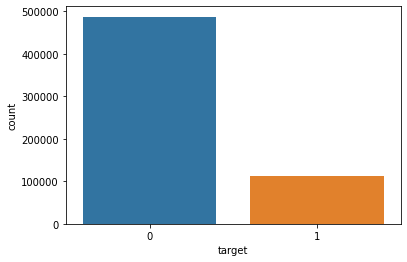

In [6]:
sns.countplot(x = df.target)

In [7]:
# this shows the data is skewed so we will use AUC as a metric
df.ord_2.unique()

array(['Hot', 'Warm', 'Freezing', 'Lava Hot', 'Cold', 'Boiling Hot', nan],
      dtype=object)

In [8]:
#We will use the ord_2 column which has six different values. We need to convert it into numeric
# I will create a dictionary that maps these values to numbers i.e 1,2,3-N where N is the total number of categories in a given feature
mapping = {
    "Freezing" : 0,
    "Warm" : 1,
    "Cold" : 2,
    "Boiling Hot" : 3,
    "Hot" : 4,
    "Lava Hot" : 5
}

df.loc[:, "ord_2"] = df.ord_2.map(mapping)
print(df.ord_2)

0         4.0
1         1.0
2         0.0
3         5.0
4         2.0
         ... 
599995    0.0
599996    3.0
599997    0.0
599998    1.0
599999    3.0
Name: ord_2, Length: 600000, dtype: float64


In [22]:
# we can do the above proces using sklearn
from sklearn import preprocessing
def mapping(df):
    # fill NaN with NONE
    df.loc[:, 'ord_2'] = df['ord_2'].fillna("NONE")
    
    label_enc = preprocessing.LabelEncoder()
    
    # P.S: do not use this directly. fit first, then transform
    
    df.loc[:, 'ord_2'] = label_enc.fit_transform(df['ord_2'].values)

In [23]:
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [24]:
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [9]:
df.ord_2.unique()

array([ 4.,  1.,  0.,  5.,  2.,  3., nan])

In [27]:
df.ord_2.unique()

array([ 4.,  1.,  0.,  5.,  2.,  3., nan])

We can use this directlyin many tree-based models:
 * Decision Trees
 * Random Forest
 * Extra Trees
 * Or any kind of boosted trees model like:
               XGBoost, GBM, LightGBM

This type of encoding cannot be used in linear models, support vector machines or neural networks as they expect data to be normalized(or standardized)

For this type of models, We can binarize the data. This is just converting the categories t numbers and then converting them to their binary representation.

e.g freezing : 0 0 0 1
    warm : 0 0 1 0
    cold : 0 0 1 1
Thus we're splitting one feature into three(in this case) feature(or columns). If we have more categories, we might end up splitting into a lot more columns.

It becomes easy to store lots of binarized variables like this if we store them in a sparse format
`A Sparse format` is nothing but a representation or way of storing data in memory in which you do not store all the values that matter. In this case of binary varibales described above, all that matters is where we have ones(1s)

Our features are stored in the form of a matrix

lets use a simple python snippet





In [15]:
# create a feature matrix

example = np.array(
    [
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 1]
    ]
)

# print size in bytes
print(example.nbytes)

36


In [11]:
data = np.array([
    [0,0,1],
    [1,0,0],
    [1,0,1]
])

In [12]:
print(data.nbytes)

36


In [16]:
total_size = example.size*example.itemsize

In [17]:
print(total_size)

36


In [18]:
from scipy import sparse
sparse_data = sparse.csr_matrix(data)
print(sparse_data.data.nbytes)

16


In [19]:
print(sparse_data.data.nbytes + sparse_data.indptr.nbytes + sparse_data.indices.nbytes)

48


In [23]:
# There is another transformatoin which makes much less memory than sparse mastrix as well
# and that is one-hot encoding
# just look at the image below
from sklearn import preprocessing

data = np.array([
    [0,0,0,0,1,0],
    [0,1,0,0,0,0],
    [1,0,0,0,0,0]
])

sparse_d = sparse.csr_matrix(data)
print(sparse_d.data.nbytes + sparse_d.indptr.nbytes + sparse_d.indices.nbytes)
# this iis just 52

# let's implement it on big data

data = np.random.randint(1000, size=1000000)

one_hot = preprocessing.OneHotEncoder(sparse = False)
oh_data = one_hot.fit_transform(data.reshape(-1,1))
print(f"size of dense array : {oh_data.nbytes}")

one_hot = preprocessing.OneHotEncoder(sparse = True)
oh_data = one_hot.fit_transform(data.reshape(-1,1))
print(f"size of full sparse array : {oh_data.data.nbytes + oh_data.indptr.nbytes + oh_data.indices.nbytes}")

      
      


40


MemoryError: Unable to allocate 7.45 GiB for an array with shape (1000000, 1000) and data type float64

Sparse representation of binarized features takes much less memory that its dense representation but we can use `One Hot Encoding'

One hot encoding is a vector representation of our values


In [25]:
from scipy import sparse
# create binary matrix
example = np.array(
    [
        [0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
    ]
)

# print size in bytes
print(f"Size of dense array: {example.nbytes}")

# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)

# print size of this sparse matrix
print(f"Size of the sparse array: {sparse_example.data.nbytes}")

full_size = (
    sparse_example.data.nbytes +
    sparse_example.indptr.nbytes +
    sparse_example.indices.nbytes
)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 72
Size of the sparse array: 12
Full size of sparse array: 40


In [ ]:
# let's use OneHotEncoder from scikit-learn to transform our feature array with 1001 categories into dense and saprse matrices
from sklearn import preprocessing

# create random 1-d array with 1001 diffrent categories (int)
example = np.random.randint(1000, size=1000000)

# initialize OneHotEncoder from scikit-learn
# keep sparse = False to get dense array
ohe = preprocessing.OneHotEncoder(sparse=False)

# fit and transform data with dense one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))

# print size in bytes for dense array
print(f"Size of dense array: {ohe_example.nbytes}")

# initialize OneHotEncoder
# keep sparse = True to get sparse array
ohe = preprocessing.OneHotEncounter(sparse=True)

# fit and transform data with sparse one-hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))

full_size = (
    ohe_example.data.nbytes +
    ohe_example.indptr.nbytes + ohe_example.indices.nbytes
)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")